# Задачи к лекции "Восстановление кривой доходности"
Чтобы определить валюты, для которых Вы будете строить кривые и дату завершения форвардного контракта, запустить функцию ниже с Вашим почтовым ящиком 

In [15]:
def getVariant(email):
    ccy = ['NOK', 'SEK', 'DKK', 'EUR']
    h = hash(email)
    ccy1 = ccy[h % 4]
    date = 365 + h%365
    print 'Task 1: 5Y curve for ' + ccy1
    print 'Task 2: FX Forward for USD' + ccy1 + ' with maturity date ' + str(date)
getVariant('stayaptichek@gmail.com')

Task 1: 5Y curve for SEK
Task 2: FX Forward for USDSEK with maturity date 524


## Задачa 1
Взять значения базовых ставок https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/base-rates
и цену процентных свопов https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/swap-rates
Восстановить кривую для Вашей валюты 

0.030335048250253894


ValueError: x and y must have same first dimension, but have shapes (4,) and (2,)

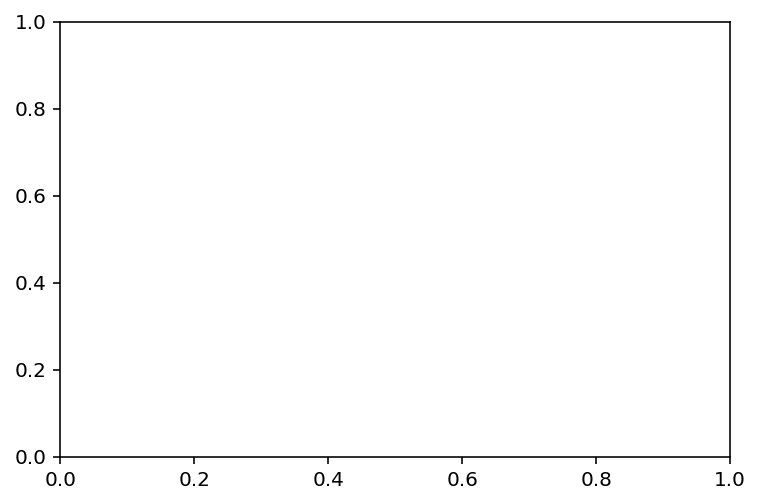

In [19]:
s0=0
s1= 0.03
#s2= 
#s3= 

r0 = s0

import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as pt

# Дискаунт фактор из процентной ставки
# для простоты капитализация процентов не учитывается
def DF(L,m):
    return 1.0 / (1.0 + L*m/12)


def S1(r12, r0, s1):
    r6 = 0.5* (r0 + r12)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s1

r12 = scipy.optimize.broyden1(lambda x: S1(x, s0, s1), 0.0)

print(r12)

pt.plot([0, 12, 24, 36], [r0, r12])


In [0]:
S1(x, s0, s1)